In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
import keras


sns.set()

In [ ]:
data = pd.read_csv('shopping_trends_updated.csv')

##The dataset encompasses a wide array of features, each providing a unique perspective into the habits and preferences of customers.

In [ ]:
# Statistical description (mean, standard deviation and quantiles)

data.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [ ]:
numerical_data = data.describe(include='all')

In [ ]:
categorical_data = data.describe(include=['object'])
categorical_data

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [ ]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
data['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [ ]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## DATA PREPROCESSING

In [ ]:
# Sample item features (price, category, size, frequency_of_purchase)
item_features = data[['Category', 'Purchase Amount (USD)',	'Size', 'Subscription Status',	'Previous Purchases',	'Frequency of Purchases']]


In [ ]:
item_purs_map = {'Blouse':0, 'Sweater':1, 'Jeans':2, 'Sandals':3, 'Sneakers':4, 'Shirt':5, 'Shorts':6, 'Coat':7,
                  'Handbag':8, 'Shoes':9, 'Dress':10, 'Skirt':11, 'Sunglasses':12, 'Pants':13, 'Jacket':14, 'Hoodie':15,
                  'Jewelry':16, 'T-shirt':17, 'Scarf':18, 'Hat':19, 'Socks':20, 'Backpack':21, 'Belt':22, 'Boots':23, 'Gloves':24}

cat_map = {'Clothing':0, 'Footwear':1, 'Outerwear':2, 'Accessories':3}

size_map = {'L':0, 'S':1, 'M':2, 'XL':3}

SubStat_map = {'Yes':0, 'No':1}

FreqPur_map = {'Fortnightly':0, 'Weekly':1, 'Annually':2, 'Quarterly':3, 'Bi-Weekly':4, 'Monthly':5, 'Every 3 Months':6}

In [ ]:
item_features['Category'] = item_features['Category'].map(cat_map)
item_features['Size'] = item_features['Size'].map(size_map)
item_features['Subscription Status'] = item_features['Subscription Status'].map(SubStat_map)
item_features['Frequency of Purchases'] = item_features['Frequency of Purchases'].map(FreqPur_map)
item_features['itemid'] = data['Item Purchased'].map(item_purs_map)


In [ ]:
# Adding customer ID and ratings to the item feature dataset
item_features['customerid'] = data['Customer ID']
item_features['ratings'] = data['Review Rating']

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# selecting first 10 users for the recommendation system to save time and space complexity
item_features = item_features.iloc[:100,:]

In [ ]:
# Preprocess the data
num_users = item_features['customerid'].nunique()
num_items = item_features['itemid'].nunique()
ratings = item_features['ratings'].values
user_ids = item_features['customerid'].values
item_ids = item_features['itemid'].values

In [ ]:
# Convert user and item IDs to zero-based indices
user_indices = user_ids - 1
item_indices = item_ids - 1



In [ ]:
# Additional features to be incorporated
additional_feat = item_features[['Category', 'Purchase Amount (USD)', 'Size', 'Subscription Status', 'Previous Purchases', 'Frequency of Purchases']].values
add_feat = item_features[['Category', 'Purchase Amount (USD)', 'Size', 'Subscription Status', 'Previous Purchases', 'Frequency of Purchases']]

# Standardize additional features
scaler = MinMaxScaler()
additional_features = scaler.fit_transform(additional_feat)

In [ ]:
# Extracting the needed features into matrixfact_data
matrixfact_data = pd.DataFrame()

matrixfact_data['itemid'] = data['Item Purchased'].map(item_purs_map)

# Adding customer ID and ratings to the item feature dataset
matrixfact_data['customerid'] = data['Customer ID']
matrixfact_data['ratings'] = data['Review Rating']

In [ ]:
matrixfact_data = matrixfact_data.iloc[:100,:]

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # selecting first 10 users for the recommendation system to save time and space complexity
# MFdata = matrixfact_data.iloc[:100,:]

In [ ]:
additional_feat = item_features[['Category', 'Purchase Amount (USD)', 'Size', 'Subscription Status', 'Previous Purchases', 'Frequency of Purchases']].values

## CLUSTERING

 **Implementation**
######K-Means clustering algorithm was used to analyze customer segmentation based on two
key features: ”Purchase Amount (USD)” and ”Previous Purchases.” Below outlines the
implementation steps:
##• Data Preprocessing: Relevant features that is, ”Purchase Amount (USD)” and
”Previous Purchases,” were selected from the dataset and standardized using the
StandardScaler from scikit-learn library to ensure each feature contributes equally
to the clustering process.
##• Determining Optimal Number of Clusters: Utilizing the Elbow Method,the
optimal number of clusters was determined by iterating K-Means with varying
cluster numbers from 1 to 10. The Within-Cluster Sum of Squares (WCSS) was
calculated for each cluster configuration, aiming to identify the ”elbow point,”
indicating the optimal number of clusters to be 4.
##• Model Training: the K-Means algorithm was instantiated with the determined
optimal number of clusters. Additionally, parameters such as the initialization
method (’k-means++’) and the random state for reproducibility were specified.
##• Cluster Assignment: The K-Means algorithm was trained on the scaled data,
and cluster labels were assigned to each data point.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data_scaled = item_features[['Previous Purchases','Purchase Amount (USD)']]


In [ ]:
data_scaled.head()

,Previous Purchases,Purchase Amount (USD)
0,14,53
1,2,64
2,23,73
3,49,90
4,31,49


In [ ]:

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_scaled)

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

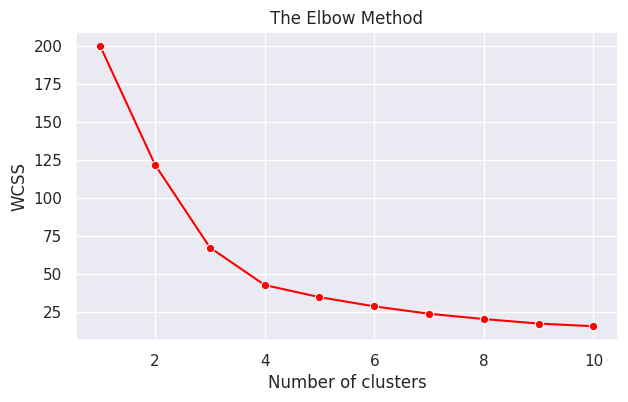

In [ ]:
plt.figure(figsize=(7,4))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, n_init='auto', random_state=5)
kmeans.fit(data_scaled)

labels1 = kmeans.labels_

In [ ]:
labels1

array([3, 1, 1, 2, 0, 3, 2, 3, 1, 3, 3, 1, 2, 0, 0, 1, 0, 0, 3, 2, 0, 1,
       0, 2, 3, 3, 3, 1, 2, 3, 3, 2, 2, 0, 2, 0, 2, 3, 0, 1, 2, 0, 1, 1,
       0, 3, 0, 0, 0, 0, 0, 1, 3, 0, 2, 0, 2, 1, 0, 1, 3, 1, 0, 2, 1, 0,
       1, 0, 3, 1, 0, 0, 3, 2, 1, 1, 0, 0, 2, 2, 1, 2, 3, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0], dtype=int32)

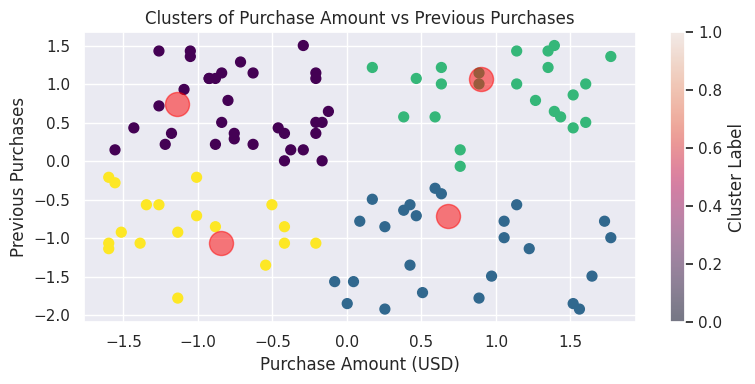

In [ ]:
plt.figure(figsize=(8, 4))

# Plot each pair of scaled features against each other
plt.scatter(x=data_scaled[:,1], y=data_scaled[:, 0], c=labels1, cmap='viridis', s=50)
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=300, c='red', alpha=0.5)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Previous Purchases')
plt.title('Clusters of Purchase Amount vs Previous Purchases')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

From the scatterplot, ”Purchase Amount (USD)” on the
x-axis and ”Previous Purchases” on the y-axis. Each data point was colored ac-
cording to its assigned cluster label, facilitating the visual identification of different
customer segments. Additionally, we plotted the cluster centroids (representative
points) on the scatter plot to indicate the central tendencies of each cluster.
From the plot below, there are 4 clusters representing individuals with higher
previous purchase and lower purchase amount (purple), lower previous purchase
and lower purchase amount (yellow), lower previous purchase and higher purchase
amount (blue) and higher previous purchase and higher purchase amount (green)
.


## MATRIX FACTORIZATION

Traditional Matrix Factorization
In the traditional matrix factorization method implemented, the user-item interaction
matrix R was factorized into three matrices: P , Q, and F , representing user latent
factors, item latent factors, and additional item features, respectively.
The predicted rating ˆRui for user u and item i can be calculated as the dot product of
the corresponding latent feature vectors:
24
ˆRui =
K∑
k=1
Puk × Qik × Fjk
where:
• Puk represents the kth latent feature of user u.
• Qik represents the kth latent feature of item i.
• Fjk represents the kth latent feature of additional item feature j.
• K denotes the dimensionality of the latent feature space.

In [ ]:
# Create the ratings matrix R, from provided ratings
R = np.zeros((num_users, num_items))
for rating, user_idx, item_idx in zip(ratings, user_indices, item_indices):
    R[user_idx, item_idx] = rating

In [ ]:
print(R)

[[0.  0.  0.  ... 0.  0.  3.1]
 [3.1 0.  0.  ... 0.  0.  0. ]
 [0.  3.1 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  2.6 0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [ ]:
def mf_with_features(R, additional_features, k, n_epoch=5000, lr=.0003, l2=.04):
    tol = .001  # Tolerant loss.
    m, n = R.shape
    # Initialize the embedding weights and additional feature weights
    P = np.random.rand(m, k)
    Q = np.random.rand(n, k)
    F = np.random.rand(additional_features.shape[1], k)
    for epoch in range(n_epoch):
        # Update weights by gradients.
        for u, i in zip(*R.nonzero()):
            err_ui = R[u,i] - np.dot(P[u,:] + np.dot(additional_features[u], F), Q[i,:])
            for j in range(k):
                P[u][j] += lr * (2 * err_ui * Q[i][j] - l2/2 * P[u][j])
                Q[i][j] += lr * (2 * err_ui * (P[u][j] + np.dot(additional_features[u], F[:,j])) - l2/2 * Q[i][j])
                F[:,j] += lr * (2 * err_ui * Q[i][j] * additional_features[u] - l2/2 * F[:,j])
        # compute the loss.
        E = (R - np.dot((P + np.dot(additional_features, F)), Q.T))**2
        obj = E[R.nonzero()].sum() + lr*((P**2).sum() +(Q**2).sum())
        if obj < tol:
            break
    return P, Q, F


In [ ]:
# Set embedding dimension and train the model
k = 10  # You can adjust this value based on your preference
P, Q, F = mf_with_features(R, additional_features, k)


In [ ]:
# Define the maximum rating value in your dataset
max_rating = np.max(R)

# Generating predicted ratings for users in your dataset
predicted_ratings = np.dot((P[user_indices] + np.dot(additional_features, F)), Q.T)

# Post-processing: Clamp predicted ratings to the range [0, max_rating]
predicted_ratings = np.clip(predicted_ratings, 0, max_rating)


predicted_ratings_rounded = np.round(predicted_ratings, decimals=1)
predicted_ratings_masked = np.where(R != 0, 0, predicted_ratings_rounded)

In [ ]:
# Making item recommendations for each user
top_n = 5  # Number of top recommendations
recommended_item_ids = []
for ratings in predicted_ratings_masked:
    top_indices = np.argsort(ratings)[::-1][:top_n]
    recommended_item_ids.append(top_indices + 1)  # Convert zero-based indices to original item IDs

print("Recommended Item IDs for each user:")
for user_id, rec_ids in zip(user_ids, recommended_item_ids):
    print(f"User {user_id}: {rec_ids}")

Recommended Item IDs for each user:
User 1: [23  6 15 16 11]
User 2: [23  6 15 16 25]
User 3: [23  6  1 17  7]
User 4: [ 1 23  6 10  8]
User 5: [ 1 21  6 10 23]
User 6: [23  6 16 15 25]
User 7: [ 1 16 23  6 15]
User 8: [23  1 15 21 17]
User 9: [23  1 21  6 16]
User 10: [ 1 23 21  6 10]
User 11: [ 1 10 23 15  6]
User 12: [23 15 16  8 11]
User 13: [23  1  6 16 22]
User 14: [23  1 21  8  6]
User 15: [ 1 23  6 10 15]
User 16: [ 6 23  1 10 15]
User 17: [23  6 15 25 16]
User 18: [ 1 23  6 21 16]
User 19: [23 21 10  6 16]
User 20: [ 1 23  6 16 15]
User 21: [23  6 15  1 16]
User 22: [ 1 23  6 21 16]
User 23: [23  6 10 15  8]
User 24: [25 16  6 10 15]
User 25: [23  6  1 15 16]
User 26: [23  6  1 10 16]
User 27: [23 21  6  1  7]
User 28: [23 15 25  7 16]
User 29: [25 16  6 11 24]
User 30: [23  6  1 15 16]
User 31: [23  6  1 21 15]
User 32: [23 15  1 11  6]
User 33: [25 15  3  4  6]
User 34: [23  6 15 25  7]
User 35: [ 1 23  6 21  7]
User 36: [23  6  1 15 16]
User 37: [23  6 15 25 20]
User 38: [ 

In [ ]:
print(predicted_ratings_masked)

[[2.7 2.1 2.7 ... 4.1 2.7 0. ]
 [0.  2.2 2.6 ... 4.2 2.9 3.3]
 [4.3 0.  3.1 ... 4.7 3.9 4.1]
 ...
 [5.  3.7 4.2 ... 5.  4.5 5. ]
 [4.5 0.  3.6 ... 5.  4.1 4. ]
 [3.5 2.  2.9 ... 4.5 2.8 3.1]]


In [ ]:
# Extract item ID and item name columns from your DataFrame
item_id_name_mapping = {0: 'Blouse', 1: 'Sweater', 2: 'Jeans', 3: 'Sandals', 4: 'Sneakers', 5: 'Shirt', 6: 'Shorts',
                        7: 'Coat', 8: 'Handbag', 9: 'Shoes', 10: 'Dress', 11: 'Skirt', 12: 'Sunglasses', 13: 'Pants',
                        14: 'Jacket', 15: 'Hoodie', 16: 'Jewelry', 17: 'T-shirt', 18: 'Scarf', 19: 'Hat', 20: 'Socks',
                        21: 'Backpack', 22: 'Belt', 23: 'Boots', 24: 'Gloves'}


In [ ]:
# fetching the items that were rated within the first 10 users
rated_items = [item_id_name_mapping[item_id] for item_id in item_ids]
rated_items = list(set(rated_items))

# Print the rated items
print(rated_items)

['Backpack', 'T-shirt', 'Dress', 'Hoodie', 'Sweater', 'Scarf', 'Shoes', 'Socks', 'Sandals', 'Handbag', 'Shorts', 'Jacket', 'Sunglasses', 'Sneakers', 'Skirt', 'Boots', 'Shirt', 'Hat', 'Gloves', 'Pants', 'Belt', 'Blouse', 'Jeans', 'Jewelry', 'Coat']


In [ ]:
#Items already rated by users

items_rated = pd.DataFrame(R, columns=rated_items[:R.shape[1]], index=user_ids)

items_rated

,Backpack,T-shirt,Dress,Hoodie,Sweater,Scarf,Shoes,Socks,Sandals,Handbag,...,Boots,Shirt,Hat,Gloves,Pants,Belt,Blouse,Jeans,Jewelry,Coat
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.1
2,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Predicted ratings
pred_ratings = pd.DataFrame(predicted_ratings_masked, columns=rated_items[:predicted_ratings_masked.shape[1]], index=user_ids)

pred_ratings

,Backpack,T-shirt,Dress,Hoodie,Sweater,Scarf,Shoes,Socks,Sandals,Handbag,...,Boots,Shirt,Hat,Gloves,Pants,Belt,Blouse,Jeans,Jewelry,Coat
1,2.7,2.1,2.7,2.9,2.1,3.8,3.0,2.8,2.0,2.5,...,3.2,2.7,2.6,2.8,2.8,2.8,2.8,4.1,2.7,0.0
2,0.0,2.2,2.6,2.8,2.5,4.0,2.9,2.7,2.1,2.6,...,3.6,2.2,2.4,2.8,3.0,3.0,3.2,4.2,2.9,3.3
3,4.3,0.0,3.1,3.6,2.8,4.6,4.1,4.0,3.5,4.1,...,3.7,4.2,3.6,3.1,4.0,3.9,3.3,4.7,3.9,4.1
4,5.0,3.4,0.0,4.1,3.3,5.0,4.5,4.9,3.9,5.0,...,4.4,4.7,3.7,3.8,4.1,4.5,4.0,5.0,4.4,4.4
5,3.2,2.0,1.8,2.3,2.3,3.0,2.3,2.9,2.4,2.9,...,2.6,2.3,2.2,2.2,2.3,3.0,2.4,2.9,2.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,5.0,3.4,3.8,0.0,3.2,5.0,4.8,4.5,4.0,5.0,...,4.4,4.8,3.8,3.4,4.1,4.8,4.0,5.0,4.5,4.5
97,4.6,2.9,4.0,4.2,3.0,4.9,4.4,4.3,3.6,4.2,...,4.7,4.2,4.1,4.5,4.1,4.7,4.2,5.0,0.0,4.3
98,5.0,3.7,4.2,4.6,3.3,5.0,5.0,5.0,0.0,5.0,...,4.9,5.0,4.1,4.0,4.7,5.0,4.2,5.0,4.5,5.0
99,4.5,0.0,3.6,3.6,2.9,5.0,4.0,3.8,3.4,4.1,...,4.3,3.9,3.3,3.5,4.1,3.8,3.6,5.0,4.1,4.0


##NN IMPLEMENTATION OF MATRIX FACTORIZATION

In [ ]:
import tensorflow as tf

def create_updated_mf_model(data, user_col='customerid', item_col='itemid', k=10, dropout_rate=0.2, with_bias=False):
    # Preprocessing data
    max_userid = data[user_col].max()
    max_itemid = data[item_col].max()

    # Model architecture
    user_inputs = tf.keras.layers.Input(shape=(1,), name="user")
    item_inputs = tf.keras.layers.Input(shape=(1,), name="item")
    user_embeddings = tf.keras.layers.Embedding(
        input_dim=max_userid + 1, output_dim=k, name="user_embedding")(user_inputs)
    user_embeddings = tf.keras.layers.Dropout(dropout_rate)(user_embeddings)
    item_embeddings = tf.keras.layers.Embedding(
        input_dim=max_itemid + 1, output_dim=k, name="item_embedding")(item_inputs)
    item_embeddings = tf.keras.layers.Dropout(dropout_rate)(item_embeddings)
    dots = tf.keras.layers.Dot(axes=-1, name="logits")([user_embeddings, item_embeddings])

    if with_bias:
        user_biases = tf.keras.layers.Embedding(
            input_dim=max_userid + 1, output_dim=1, name="user_bias")(user_inputs)
        item_biases = tf.keras.layers.Embedding(
            input_dim=max_itemid + 1, output_dim=1, name="item_bias")(item_inputs)
        dots = tf.keras.layers.Add()([dots, user_biases, item_biases])

    model = tf.keras.Model(
        name="updated_matrix_factorizer",
        inputs=[user_inputs, item_inputs],
        outputs=dots
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[
            tf.keras.metrics.MeanSquaredError(),
            tf.keras.metrics.RootMeanSquaredError(),
            tf.keras.metrics.MeanAbsoluteError()
        ]
    )

    return model

# # Create the updated model
# updated_model = create_updated_mf_model(data, user_col='customerid', item_col='itemid', k=10, dropout_rate=0.2)

# # Print the summary of the updated model
# updated_model.summary()


In [ ]:
def fit_model(model, X, y, batch_size=32, epochs=10, validation_split=0.1):
    model.fit(
        x=X,
        y=y,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=validation_split
    )



In [ ]:
# Create the matrix factorization model with dropout layers
mf_model = create_updated_mf_model(matrixfact_data, user_col='customerid', item_col='itemid', k=10)
X = [matrixfact_data['customerid'].values, matrixfact_data['itemid'].values]
y = matrixfact_data['ratings'].values
fit_model(mf_model, X, y)

Epoch 1/10
3/3 [==============================] - 2s 198ms/step - loss: 15.4657 - mean_squared_error: 15.4657 - root_mean_squared_error: 3.9279 - mean_absolute_error: 3.8622 - val_loss: 16.1183 - val_mean_squared_error: 16.1183 - val_root_mean_squared_error: 4.0148 - val_mean_absolute_error: 3.9494
Epoch 2/10
3/3 [==============================] - 0s 39ms/step - loss: 15.4609 - mean_squared_error: 15.4609 - root_mean_squared_error: 3.9317 - mean_absolute_error: 3.8616 - val_loss: 16.1186 - val_mean_squared_error: 16.1186 - val_root_mean_squared_error: 4.0148 - val_mean_absolute_error: 3.9494
Epoch 3/10
3/3 [==============================] - 0s 86ms/step - loss: 15.4603 - mean_squared_error: 15.4603 - root_mean_squared_error: 3.9334 - mean_absolute_error: 3.8615 - val_loss: 16.1190 - val_mean_squared_error: 16.1190 - val_root_mean_squared_error: 4.0148 - val_mean_absolute_error: 3.9495
Epoch 4/10
3/3 [==============================] - 0s 36ms/step - loss: 15.4536 - mean_squared_error: 1

In [ ]:
predictions = mf_model.predict([matrixfact_data['customerid'].values, matrixfact_data['itemid'].values])
print(predictions[:5])

4/4 [==============================] - 0s 4ms/step
[[[3.3927865e-03]]

 [[3.3988326e-03]]

 [[1.4771248e-03]]

 [[7.0039765e-05]]

 [[1.3119536e-03]]]


In [ ]:
mf_model.summary()

Model: "updated_matrix_factorizer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 item (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 10)                1010      ['user[0][0]']                
                                                                                                  
 item_embedding (Embedding)  (None, 1, 10)                250       ['item[0][0]']                
                                                                          

In [ ]:
# Convert user_ids and item_ids to one-dimensional arrays
user_ids = matrixfact_data['customerid'].values.flatten()
item_ids = matrixfact_data['itemid'].values.flatten()


# Combine user IDs, item IDs, and predictions into a DataFrame
predictions_df = pd.DataFrame({'customerid': user_ids, 'itemid': item_ids, 'predicted_rating': predictions})

# Sort predictions to get top 5 recommended items for each user
top5_recommendations = predictions_df.groupby('customerid').apply(lambda x: x.nlargest(5, 'predicted_rating')).reset_index(drop=True)

# # Print top 5 recommended items for each user
# for user_id, recommendations in top5_recommendations.groupby('customerid'):
#     print(f"Top 5 recommended items for User {user_id}:")
#     for idx, row in recommendations.iterrows():
#         print(f"Item ID: {row['itemid']}, Predicted Rating: {row['predicted_rating']}")
#     print()


In [ ]:
top5_recommendations

**Model Architecture:**
######The neural network architecture allows for non-linear interactions between user and
item features, capturing more complex patterns in the data compared to traditional
matrix factorization. The neural network model consists of the following components:
25
##• Embedding Layers: Embedding layers are a fundamental component of neural
networks for handling categorical data. Each user and item is represented as a
dense vector in the embedding space.
##• Dot Product or Similarity Layer:
After obtaining the user and item embeddings, they are fed into a dot product
layer. The layer computes the similarity between user and item embeddings,
often using dot product. The output of this layer represents the predicted rating
or score for each user-item pair, indicating the likelihood of a user’s preference
for an item.
##• Loss Calculation: After obtaining the predicted ratings for user-item pairs,
they are compared with the actual ratings present in the training data. The loss
function, such as Mean Squared Error (MSE), is then calculated based on the
discrepancy between the predicted and actual ratings. The loss function quantifies
how well the model is performing in terms of predicting user preferences.
##• Backpropagation: Backpropagation is a fundamental step in training neural
networks. In this step, the gradients of the loss function with respect to the model
parameters (embedding weights) are computed. These gradients indicate how the
loss would change with respect to small changes in the embedding weights.
##• Parameter Updates: The optimizer utilizes the computed gradients to update
the embedding weights of the neural network. The optimizer adjusts the weights
in a way that minimizes the loss function, effectively improving the model’s ability
to make accurate predictions. Common optimization algorithms like stochastic
gradient descent (SGD) or Adam optimizer are used for this purpose.
##• Iterative Training: Steps 2 to 6 are repeated iteratively for multiple epochs.
During each epoch, the model learns from the training data, computes gradients,
updates parameters, and adjusts its predictions. Iterative training continues until
the model converges, meaning the loss stops decreasing significantly or reaches a
predefined threshold.
##• L2 Regularization: L2 regularization, commonly known as weight decay, has
been employed to prevent overfitting and enhance generalization. During training,
a penalty term proportional to the square of the weights’ magnitudes is added to
the loss function. This discourages large weights, promoting simpler models that
generalize better to unseen data. By controlling model complexity, L2 regulariza-
tion effectively reduces overfitting, thus improving performance on validation or
test data.
##• Dropout: Dropout, a regularization technique introduced by Srivastava et al. in
2014, has been integrated into the system. During training iterations, a fraction
of neurons in the neural network are randomly dropped out (set to zero) with a
predefined probability P, typically ranging between 0.2 and 0.5. Dropout prevents
the model from overly depending on specific features or neurons, fostering the
learning of more robust and generalizable representations. By introducing noise
during training, Dropout encourages neurons to learn more independent features,
26
leading to enhanced generalization performance. During inference, Dropout is
disabled, allowing the full network to be utilized for making predictions. Dropout
is particularly effective in mitigating overfitting, especially in deep neural networks
with numerous parameters and layers.

## DATA VISUALIZATION

<ipython-input-260-e3d92c92032c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo Code Used', data=data, palette='muted')


Text(0, 0.5, 'Count')

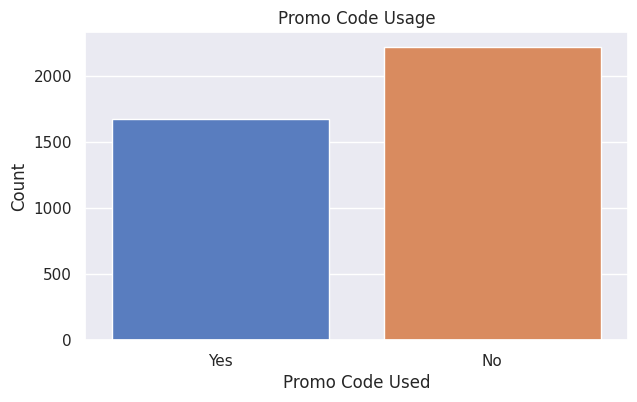

In [ ]:
plt.figure(figsize=(7, 4))

sns.countplot(x='Promo Code Used', data=data, palette='muted')
plt.title('Promo Code Usage')
plt.xlabel('Promo Code Used')
plt.ylabel('Count')

<ipython-input-261-5ae4819a372a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shipping Type', data=data, palette='Set3')


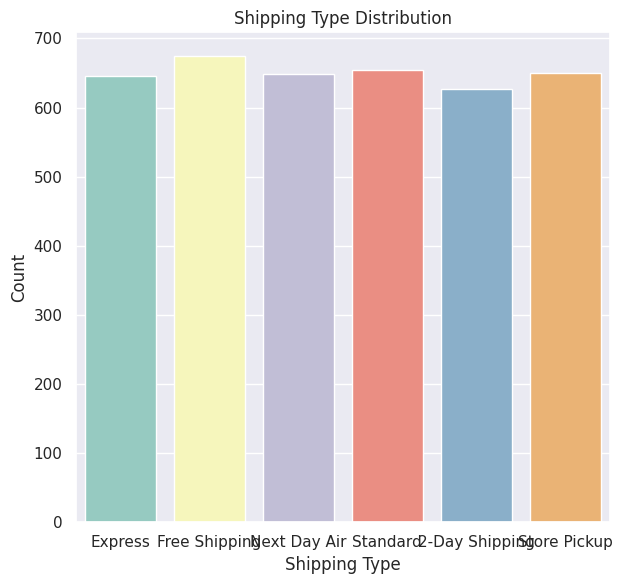

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Shipping Type', data=data, palette='Set3')
plt.title('Shipping Type Distribution')
plt.xlabel('Shipping Type')
plt.ylabel('Count')

plt.tight_layout()

<ipython-input-262-afff9a7da782>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription Status', data=data, palette='Set2')


Text(0, 0.5, 'Count')

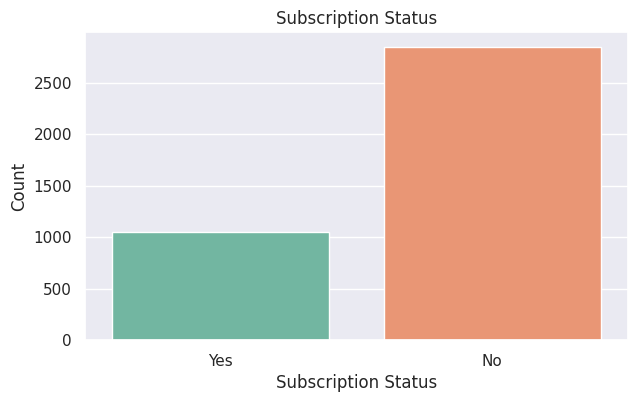

In [ ]:
plt.figure(figsize=(7, 4))

sns.countplot(x='Subscription Status', data=data, palette='Set2')
plt.title('Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

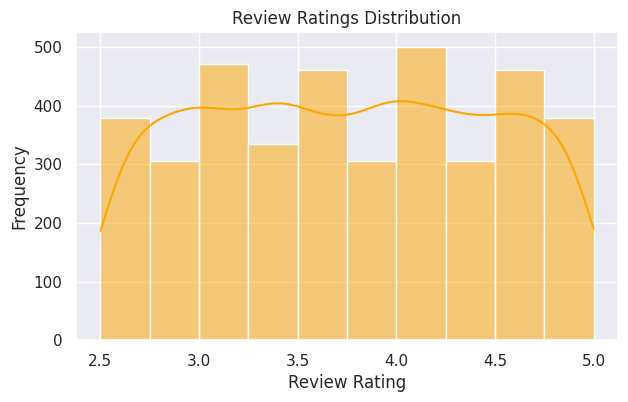

In [ ]:
plt.figure(figsize=(7, 4))

# plt.subplot(1, 2, 1)
sns.histplot(data['Review Rating'], bins=10, kde=True, color='orange')
plt.title('Review Ratings Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

With an average review rating of around 3.75 out of 5, providing
insight to businesses to promptly address any issues and maintain high levels of satis-
faction and loyalty. Standard Deviation is approximately 0.72. minimum Rating is 2.5.
Interquartile Range (IQR) is from 3.1 to 4.4

<ipython-input-264-b49872109081>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Frequency of Purchases', data=data, palette='Set2')


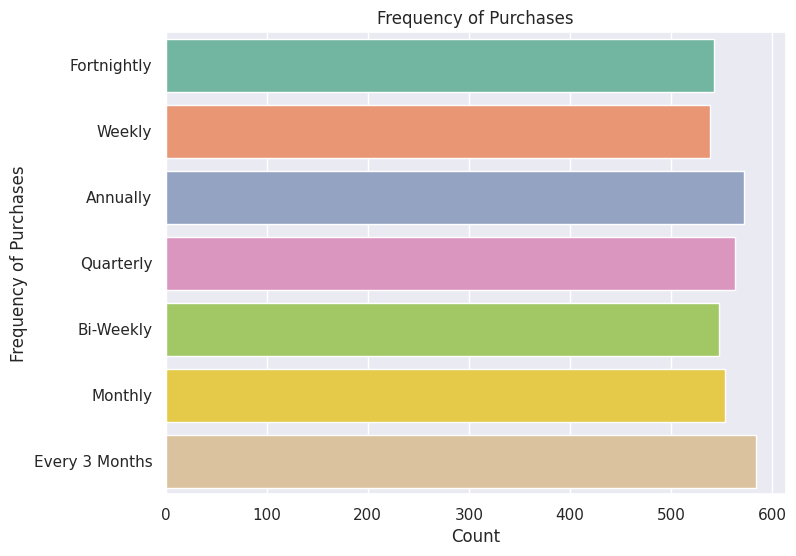

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Frequency of Purchases', data=data, palette='Set2')
plt.title('Frequency of Purchases')
plt.xlabel('Count')
plt.ylabel('Frequency of Purchases')
plt.show()

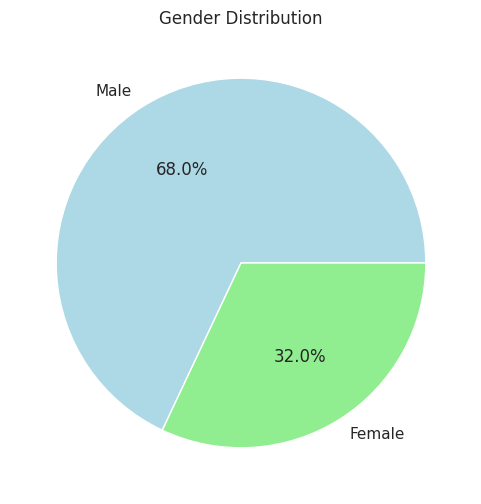

In [ ]:
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

In the dataset, 68 percent of the people are male while 32 percent are female as
shown in the figure below. Understanding these gender dynamics can enable businesses
to tailor their marketing messages and product assortments to better resonate with
their target audience (Brown and Lee, 2022).
30


<ipython-input-266-29544df49f8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Item Purchased', data=data, palette='pastel')


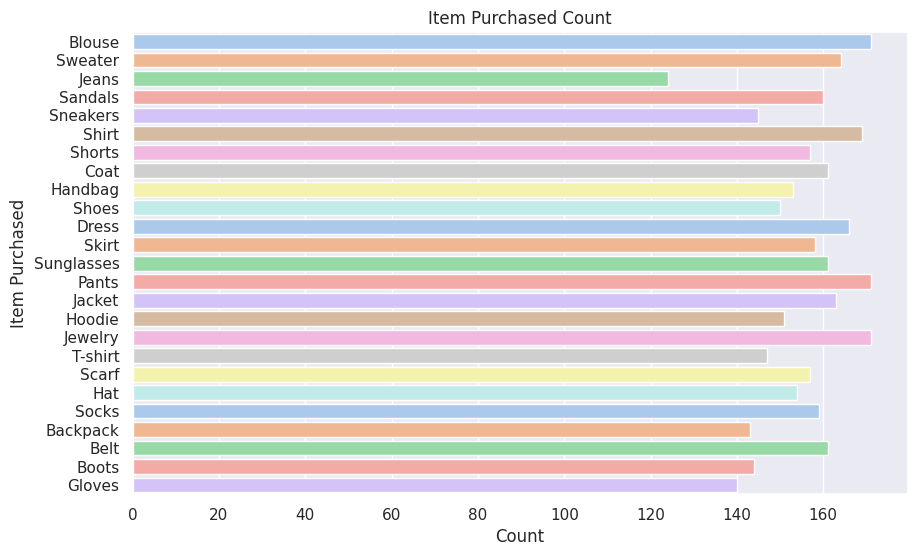

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Item Purchased', data=data, palette='pastel')
plt.title('Item Purchased Count')
plt.xlabel('Count')
plt.ylabel('Item Purchased')
plt.show()

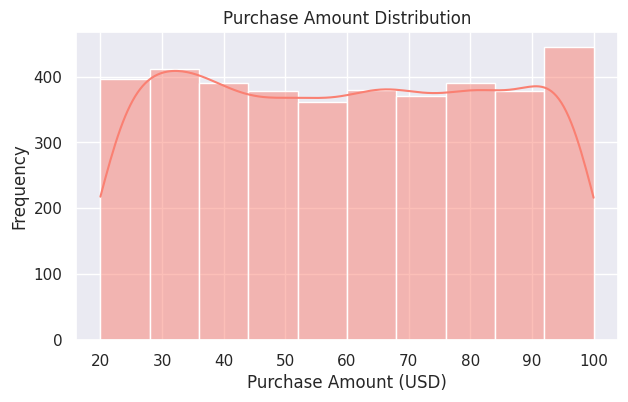

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(data['Purchase Amount (USD)'], bins=10, kde=True, color='salmon')
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

Further analysis shows that the purchase amounts ranges from $20 to $100 and an
average purchase amount of approximately $59. This shows insight into customers’
price sensitivity and willingness to spend. Moreover, understanding the distribution
of purchase amounts enables businesses to optimize pricing strategies and promotional
offers to maximize revenue and profitability

In [ ]:
pd.pivot_table(data, columns='Category', values=['Purchase Amount (USD)','Previous Purchases'], aggfunc='sum')

Category,Accessories,Clothing,Footwear,Outerwear
Previous Purchases,31900,43771,15114,8086
Purchase Amount (USD),74200,104264,36093,18524


In [ ]:
pd.pivot_table(data, columns='Item Purchased', values=['Purchase Amount (USD)','Previous Purchases'], aggfunc='sum')

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Previous Purchases,3370,3877,4563,3796,4317,4407,3702,3781,3901,3673,...,4205,4338,3790,4088,3925,3659,3965,4121,4199,3648
Purchase Amount (USD),8636,9635,10410,9018,9275,10320,8477,8857,9375,8767,...,9561,10332,9240,9433,9402,8635,9252,9649,9462,9248


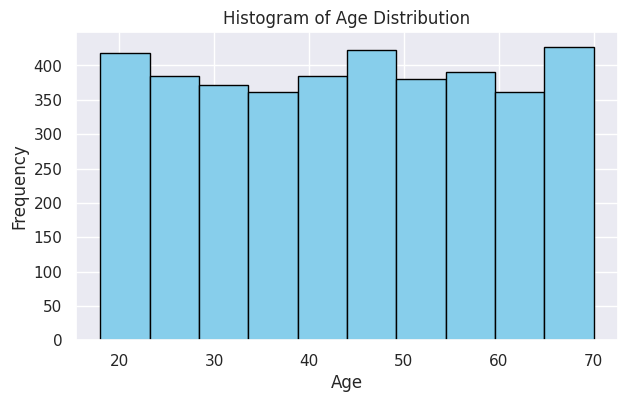

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.grid(True)
plt.show()


The age feature is a fundamental demographic variable, ranging from 18 to 70 years,
with a mean age of approximately 44 years.
Figure 9: Example Image
This age distribution offers valuable insights into the target demographic of the
business, allowing for tailored marketing strategies and product offerings.

In [ ]:
data['Frequency of Purchases'].value_counts()



Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [ ]:
item_features.head()

,Category,Purchase Amount (USD),Size,Subscription Status,Previous Purchases,Frequency of Purchases,itemid,customerid,ratings
0,0,53,0,0,14,0,0,1,3.1
1,0,64,0,0,2,0,1,2,3.1
2,0,73,1,0,23,1,2,3,3.1
3,1,90,2,0,49,1,3,4,3.5
4,0,49,2,0,31,2,0,5,2.7


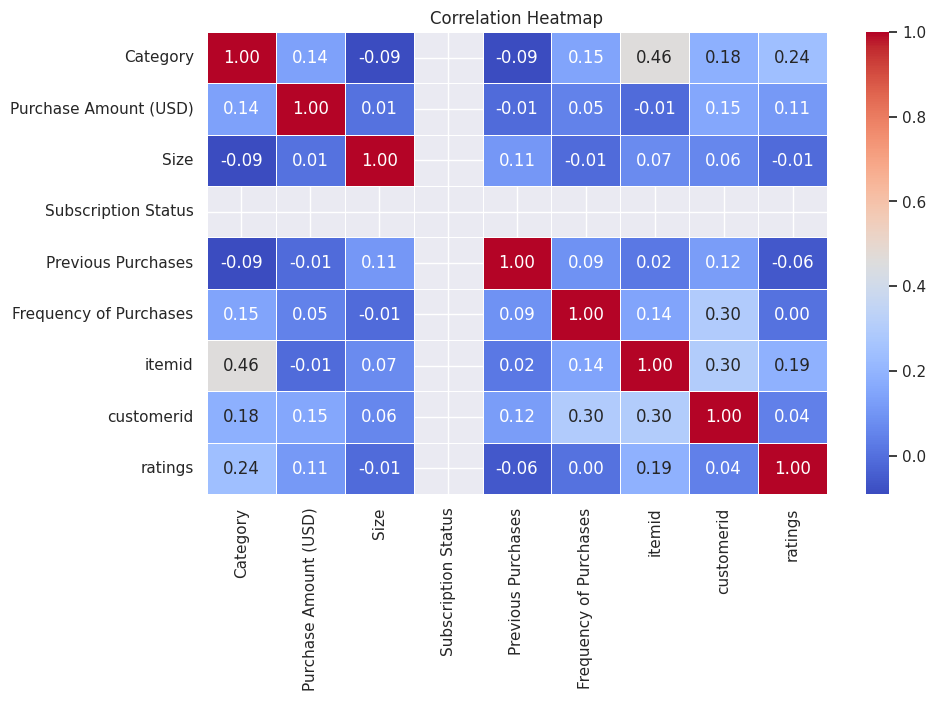

In [ ]:
# Heatmap to visualize correlations between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(item_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()